In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,mean_squared_error , r2_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import seaborn as sns

In [2]:
df =pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: xlabel='price_range', ylabel='Count'>

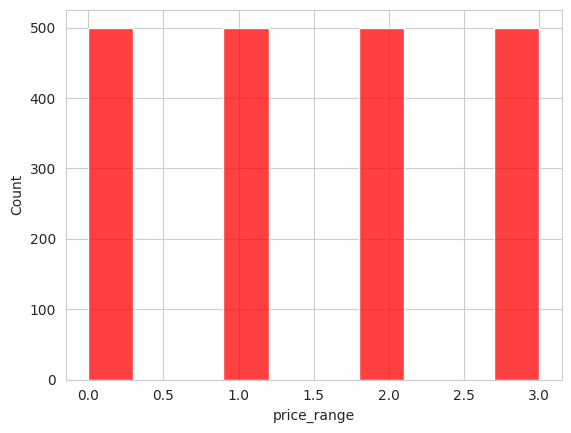

In [7]:
sns.set_style('whitegrid')

sns.histplot(df['price_range'],color ='red', bins = 10)

<Axes: xlabel='ram', ylabel='Count'>

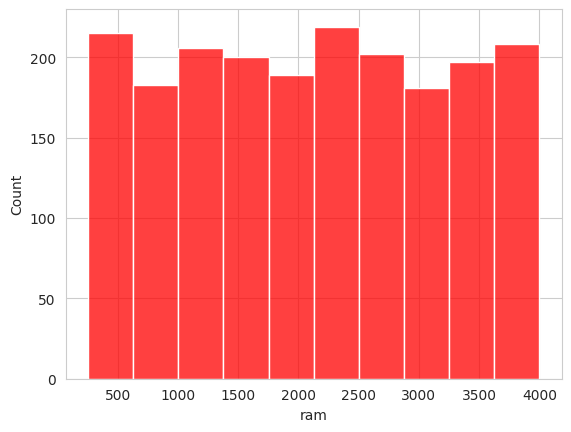

In [8]:


sns.set_style('whitegrid')

sns.histplot(df['ram'],color ='red', bins = 10)

In [9]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [10]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [11]:
df.ram.unique()

array([2549, 2631, 2603, ..., 2032, 3057, 3919])

In [12]:
df.ram.value_counts()

ram
1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: count, Length: 1562, dtype: int64

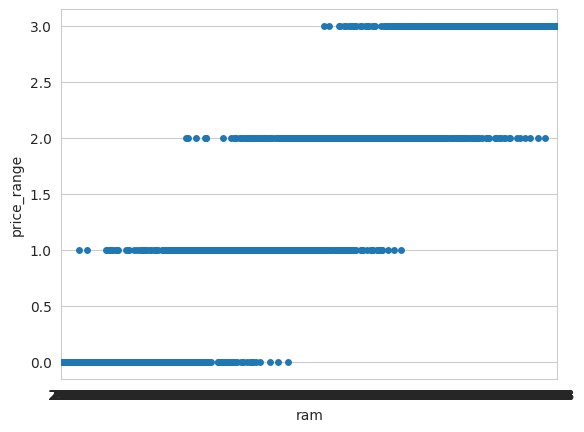

In [13]:
sns.stripplot(x="ram", y="price_range", data=df)

plt.show()

In [14]:
fig = px.pie(df, names='price_range')

fig.show()

#phones prices have 4 categories, all categories are equaled in count 500 for each category

In [15]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [16]:
df.clock_speed.unique()

array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])

In [17]:
df.blue.unique()

array([0, 1])

In [18]:
df.blue.value_counts()

blue
0    1010
1     990
Name: count, dtype: int64

In [19]:
fig = px.pie(df, names='blue')

fig.show()

In [20]:
df.dual_sim.unique()

array([0, 1])

<Axes: xlabel='blue', ylabel='Count'>

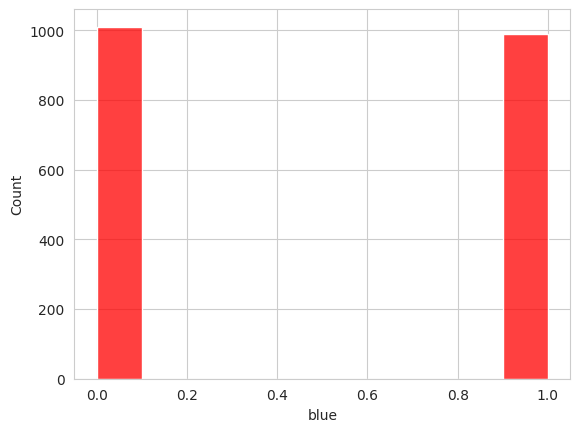

In [21]:
sns.set_style('whitegrid')

sns.histplot(df['blue'],color ='red', bins = 10)

In [22]:
df.dual_sim.value_counts()

dual_sim
1    1019
0     981
Name: count, dtype: int64

<Axes: xlabel='dual_sim', ylabel='Count'>

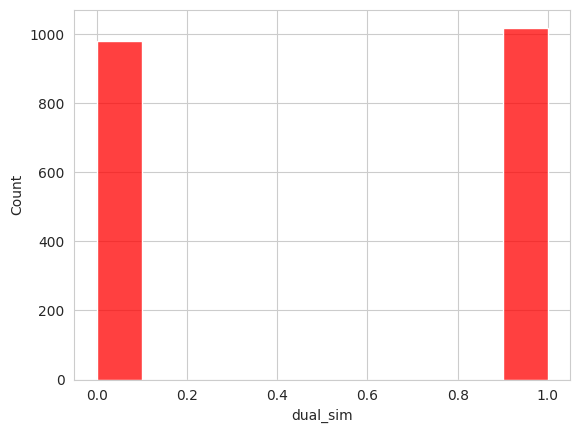

In [23]:
sns.set_style('whitegrid')

sns.histplot(df['dual_sim'],color ='red', bins = 10)

#phone have daul sim more than 1000

#phones doesn't have dual sim less than 1000

In [24]:
fig = px.pie(df, names='dual_sim')

fig.show()

#phones have dual sim more than phones doesn't have

In [25]:
df.fc.unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19])

In [26]:
df.fc.value_counts()

fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: count, dtype: int64

In [27]:
df.four_g.unique()

array([0, 1])

In [28]:
df.four_g.value_counts()

four_g
1    1043
0     957
Name: count, dtype: int64

In [29]:
fig = px.pie(df, names='four_g')

fig.show()

#the phones with four G more than phones without four G

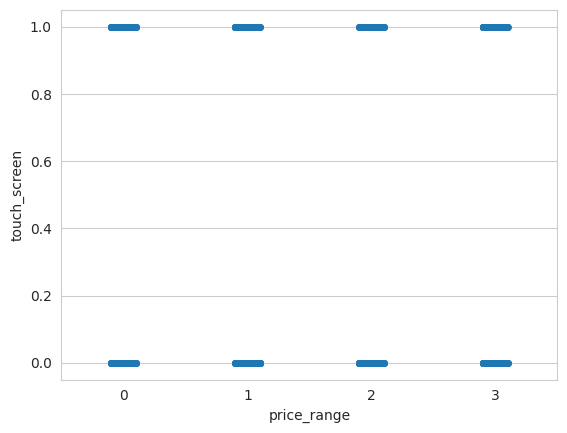

In [30]:
sns.stripplot(y="touch_screen", x="price_range", data=df)

plt.show()

<Axes: xlabel='four_g', ylabel='Count'>

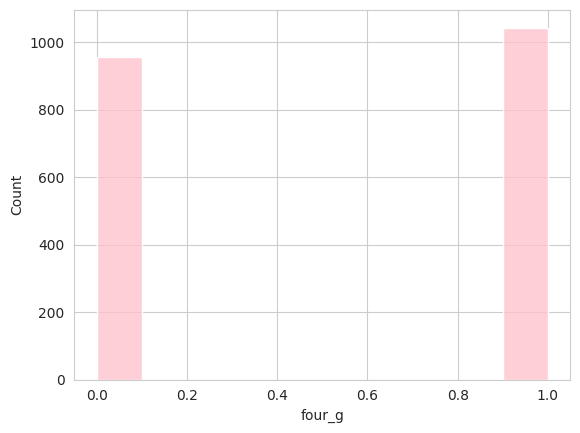

In [31]:
sns.set_style('whitegrid')

sns.histplot(df['four_g'],color ='pink', bins = 10)

#the count of phones have four G more than 1000 phone

#the count of phones didin't have four G less than 1000 phone

<Axes: xlabel='fc', ylabel='Count'>

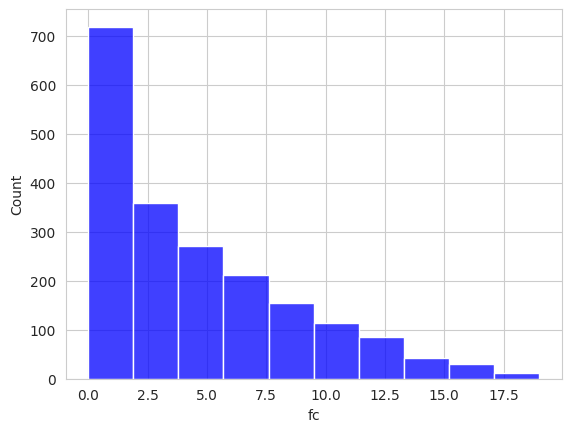

In [32]:
sns.set_style('whitegrid')

sns.histplot(df['fc'],color ='blue', bins = 10)

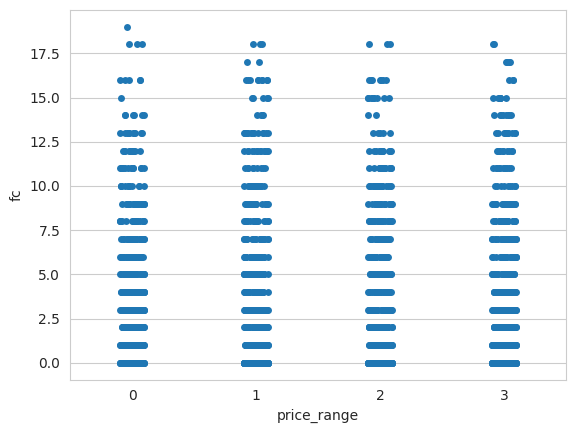

In [33]:
sns.stripplot(y="fc", x="price_range", data=df)

plt.show()

In [34]:
df.int_memory.unique()

array([ 7, 53, 41, 10, 44, 22, 24,  9, 33, 17, 52, 46, 13, 23, 49, 19, 39,
       47, 38,  8, 57, 51, 21,  5, 60, 61,  6, 11, 50, 34, 20, 27, 42, 40,
       64, 14, 63, 43, 16, 48, 12, 55, 36, 30, 45, 29, 58, 25,  3, 54, 15,
       37, 31, 32,  4, 18,  2, 56, 26, 35, 59, 28, 62])

In [35]:
df.shape

(2000, 21)

In [36]:
fig = px.pie(df, names='touch_screen')

fig.show()

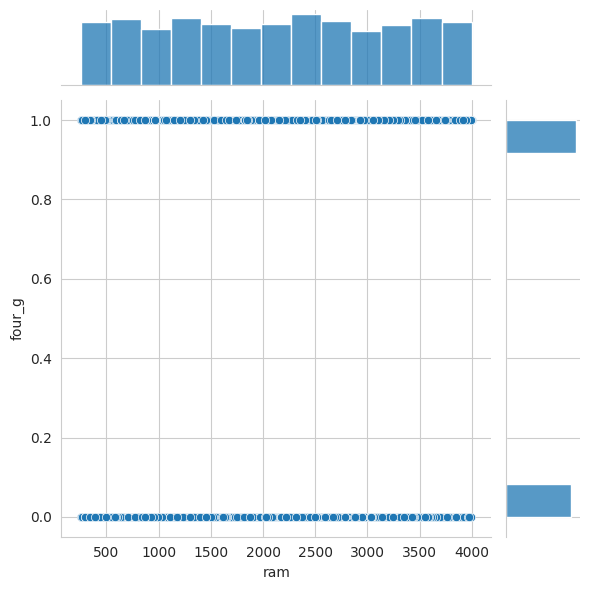

In [37]:
sns.jointplot(x ='ram', y ='four_g', data = df)


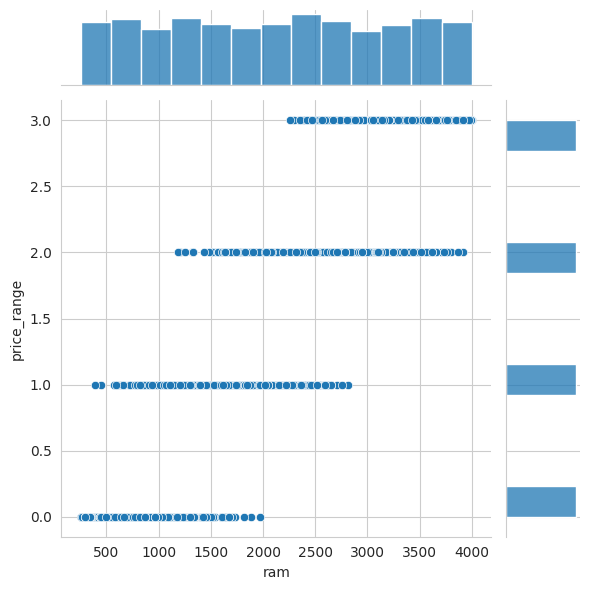

In [38]:
sns.jointplot(x ='ram', y ='price_range', data = df)

#relation between ram and phone price we can say ram increase prince increase

In [39]:
fig = px.pie(df, names='wifi')

fig.show()

#phones that have wifi more than that doesn't support

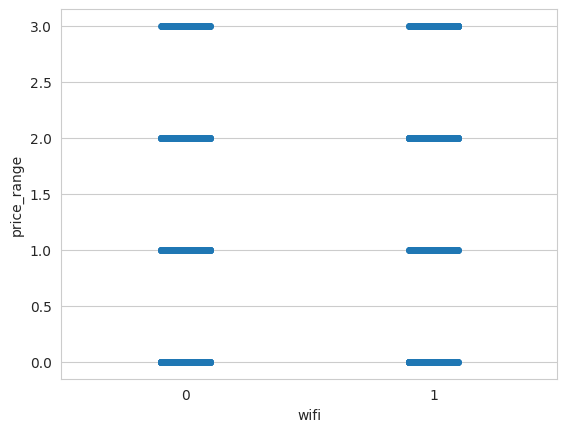

In [40]:
sns.stripplot(x="wifi", y="price_range", data=df)

plt.show()

In [41]:
df.wifi.unique()

array([1, 0])

In [42]:
df.wifi.value_counts()

wifi
1    1014
0     986
Name: count, dtype: int64

In [43]:
df.touch_screen.unique()

array([0, 1])

In [44]:
df.touch_screen.value_counts()

touch_screen
1    1006
0     994
Name: count, dtype: int64

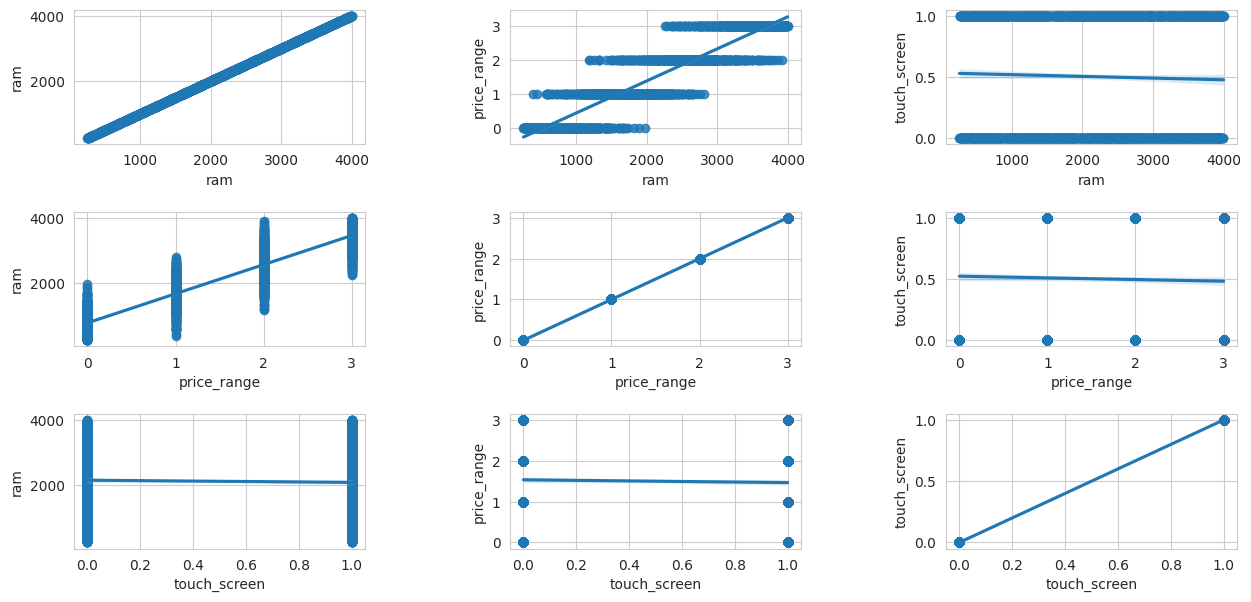

In [45]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['ram' , 'price_range' , 'touch_screen']:
    for y in ['ram' , 'price_range' , 'touch_screen']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

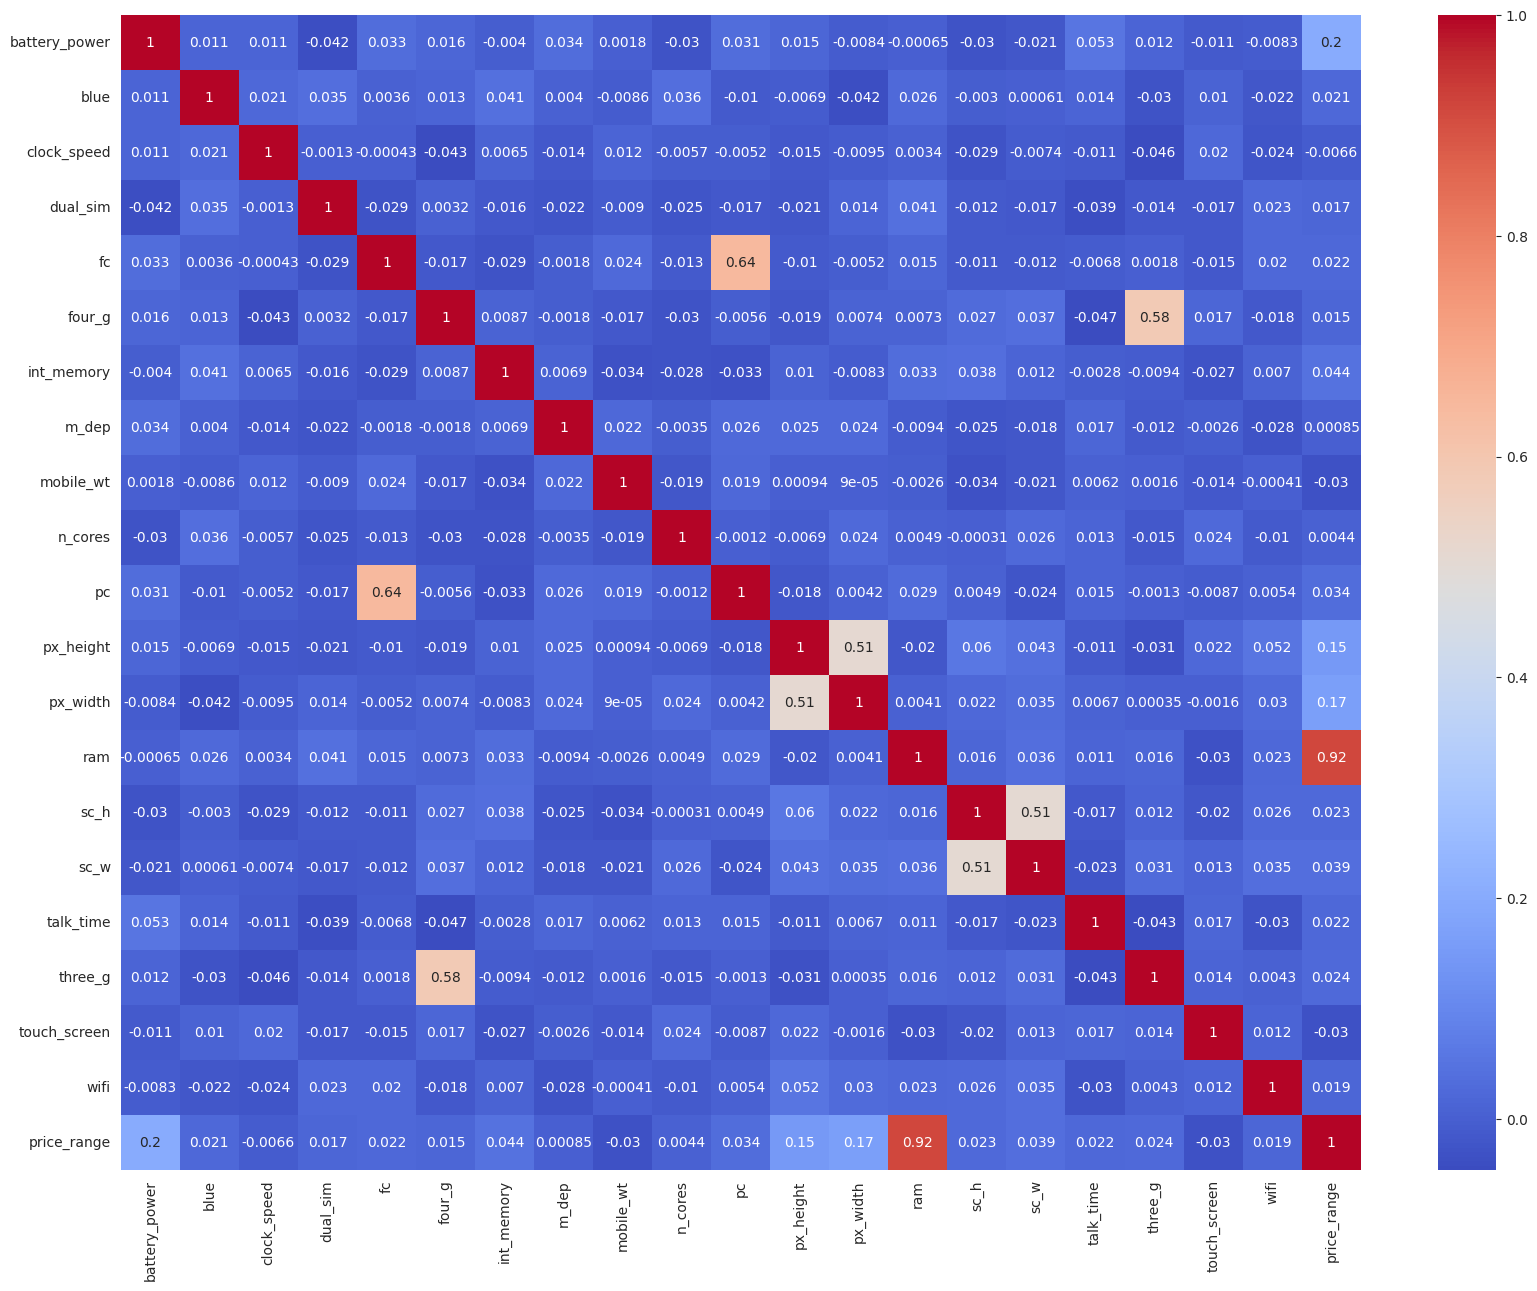

In [46]:
plt.figure(figsize=(20,15 ))

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

plt.show()

In [47]:
threshold = 0.003

correlation_matrix = df.corr()

high_corr_features = correlation_matrix.index[abs(correlation_matrix["price_range"]) > threshold].tolist()

high_corr_features.remove("price_range")

print(high_corr_features)

X_selected = df[high_corr_features]

Y = df["price_range"]

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [48]:
X_selected

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,10,19,1,1,1


In [49]:
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [50]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_selected)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [52]:
X_test

array([[ 0.92755239, -0.9900495 ,  1.19851653, ...,  0.55964063,
         0.99401789, -1.01409939],
       [-0.12865337, -0.9900495 , -1.2530642 , ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 1.669628  , -0.9900495 ,  1.68883267, ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [-0.44278354, -0.9900495 ,  0.34046327, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.16209609, -0.9900495 ,  1.4436746 , ...,  0.55964063,
         0.99401789,  0.98609664],
       [-0.12182446, -0.9900495 ,  0.46304231, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [53]:
X_train

array([[ 1.55808903, -0.9900495 , -1.2530642 , ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.37834511,  1.0100505 ,  0.83077942, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-0.00573288, -0.9900495 , -0.76274805, ...,  0.55964063,
        -1.00601811,  0.98609664],
       ...,
       [ 1.34411631,  1.0100505 , -1.2530642 , ...,  0.55964063,
        -1.00601811,  0.98609664],
       [ 1.56719425, -0.9900495 , -0.76274805, ..., -1.78686097,
         0.99401789,  0.98609664],
       [-1.3737925 ,  1.0100505 , -1.13048516, ...,  0.55964063,
        -1.00601811, -1.01409939]])

In [54]:
Y_test

1860    0
353     2
1333    1
905     3
1289    1
       ..
965     3
1284    2
1739    1
261     1
535     2
Name: price_range, Length: 400, dtype: int64

In [55]:
Y_train

968     1
240     2
819     0
692     3
420     1
       ..
1130    3
1294    0
860     2
1459    3
1126    1
Name: price_range, Length: 1600, dtype: int64

In [56]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [57]:
Y_pred = logreg.predict(X_test)

In [58]:
Y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [59]:
accuracy=accuracy_score(Y_pred, Y_pred)

conf_matrix=confusion_matrix(Y_test, Y_pred)

class_report=classification_report(Y_test, Y_pred)



print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")

print(conf_matrix)

print("\nClassification Report:")

print(class_report)

Accuracy: 1.0000

Confusion Matrix:
[[101   4   0   0]
 [  0  91   0   0]
 [  0   0  89   3]
 [  0   0   1 111]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.96      1.00      0.98        91
           2       0.99      0.97      0.98        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



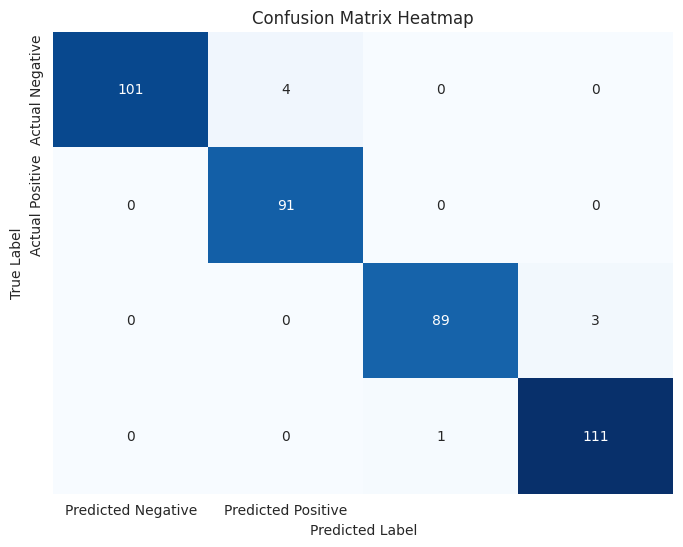

In [60]:
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,

            xticklabels=["Predicted Negative", "Predicted Positive"],

            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")

plt.ylabel("True Label")

plt.title("Confusion Matrix Heatmap")

plt.show()

In [61]:
print(accuracy_score(Y_test, Y_pred))

0.98


In [62]:
lasso = Lasso(alpha=0.0002)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.0002)

In [63]:
lasso.score(X_train, Y_train)

0.9175669995357632

In [64]:
y_pred = lasso.predict(X_test)

In [65]:
print(mean_squared_error(Y_test, y_pred))

0.10454691196196571


In [66]:
print(r2_score(Y_test, y_pred))

0.9216433189498053


In [67]:
ridge = Ridge(alpha=0.00001)
ridge.fit(X_train, Y_train)

Ridge(alpha=1e-05)

In [68]:
ridge.score(X_train, Y_train)

0.9175677499141918

In [69]:
y_pred = ridge.predict(X_test)

In [70]:
print(mean_squared_error(Y_test, y_pred))

0.10457883635570914


In [71]:
print(r2_score(Y_test, y_pred))

0.9216193919921235
